# Demographics Analysis

In [126]:
import firebase_admin
from firebase_admin import credentials
from firebase_admin import firestore
import matplotlib.pyplot as plt
import pandas as pd

### Authorization

Generate a key in the Firebase Console!

In [127]:
cred = credentials.Certificate("/Users/lauracorssac/idp-lets-go-e92b8-firebase-adminsdk-fbsvc-42ad0e1400.json")
# firebase_admin.initialize_app(cred)

### Users Fetch

Warning: Don't do it often! This counts as one read per user, so it might get expensive!

In [128]:
db = firestore.client()

users_ref = db.collection("users")
docs = users_ref.stream()

user_data = []
for doc in docs:
    user_data.append(doc.to_dict())

print(user_data)

[{'birthYear': '1998', 'trials': [{'responseTime': 1622, 'step': 2}, {'responseTime': 2208, 'step': 1}, {'responseTime': 1992, 'step': 7}, {'responseTime': 3011, 'step': 3}, {'responseTime': 2644, 'step': 3}, {'responseTime': 1890, 'step': 2}, {'responseTime': 1805, 'step': 5}, {'responseTime': 1673, 'step': 5}, {'responseTime': 4064, 'step': 3}, {'responseTime': 2342, 'step': 1}, {'responseTime': 8363, 'step': 1}, {'responseTime': 1522, 'step': 1}, {'responseTime': 3747, 'step': 2}, {'responseTime': 2923, 'step': 4}, {'responseTime': 1973, 'step': 6}, {'responseTime': 1973, 'step': 4}, {'responseTime': 2142, 'step': 1}, {'responseTime': 2862, 'step': 6}, {'responseTime': 1972, 'step': 3}, {'responseTime': 4565, 'step': 6}, {'responseTime': 1891, 'step': 4}, {'responseTime': 2259, 'step': 2}, {'responseTime': 1870, 'step': 6}, {'responseTime': 5773, 'step': 7}, {'responseTime': 2727, 'step': 6}, {'responseTime': 3695, 'step': 7}, {'responseTime': 2007, 'step': 5}, {'responseTime': 1488

In [129]:
counts_control = len([user for user in user_data if user.get("group") == "control"])
counts_target = len([user for user in user_data if user.get("group") == "target"])

print(counts_control, counts_target, len(user_data))

10 12 22


## Race Anaysis

In [130]:
races = [user.get("races") for user in user_data if user.get("races") is not None]
races_control = [user.get("races") for user in user_data if user.get("group") == "control"]
races_target = [user.get("races") for user in user_data if user.get("group") != "control"]

print(races)
print(races_control)
print(races_target)

[['Hispanic / Latino'], ['Other / Prefer not to say'], ['Hispanic / Latino'], ['White'], ['Hispanic / Latino', 'White'], ['Other / Prefer not to say'], ['White'], ['Hispanic / Latino'], ['White'], ['White'], ['Other / Prefer not to say'], ['Other / Prefer not to say'], ['Middle Eastern / North African'], ['Middle Eastern / North African'], ['Asian'], ['Asian'], ['Middle Eastern / North African'], ['Hispanic / Latino', 'White'], ['Hispanic / Latino'], ['Other / Prefer not to say'], ['Hispanic / Latino'], ['Hispanic / Latino']]
[['White'], ['Other / Prefer not to say'], ['White'], ['White'], ['Other / Prefer not to say'], ['Other / Prefer not to say'], ['Asian'], ['Middle Eastern / North African'], ['Hispanic / Latino'], ['Other / Prefer not to say']]
[['Hispanic / Latino'], ['Other / Prefer not to say'], ['Hispanic / Latino'], ['Hispanic / Latino', 'White'], ['Hispanic / Latino'], ['White'], ['Middle Eastern / North African'], ['Middle Eastern / North African'], ['Asian'], ['Hispanic / 

In [131]:
# races_options = ["White", "Hispanic / Latino", "Black", "Indigenous", "Asian", "Middle Eastern / North African", "Other / Prefer not to say"]

race_counts = pd.Series([race for sublist in races for race in sublist]).value_counts()
race_counts_control = pd.Series([race for sublist in races_control for race in sublist]).value_counts()
race_counts_target = pd.Series([race for sublist in races_target for race in sublist]).value_counts()

print(race_counts)
print(race_counts_control)
print(race_counts_target)


Hispanic / Latino                 8
White                             6
Other / Prefer not to say         5
Middle Eastern / North African    3
Asian                             2
Name: count, dtype: int64
Other / Prefer not to say         4
White                             3
Asian                             1
Middle Eastern / North African    1
Hispanic / Latino                 1
Name: count, dtype: int64
Hispanic / Latino                 7
White                             3
Middle Eastern / North African    2
Other / Prefer not to say         1
Asian                             1
Name: count, dtype: int64


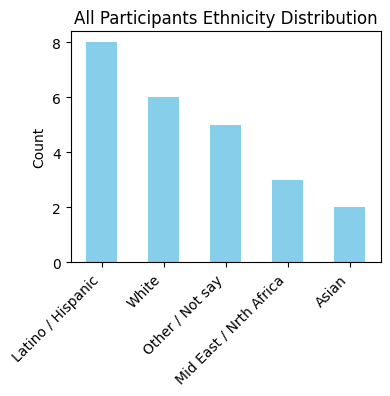

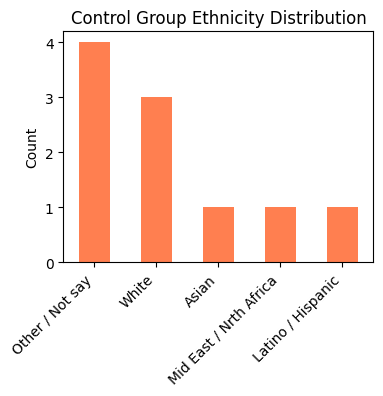

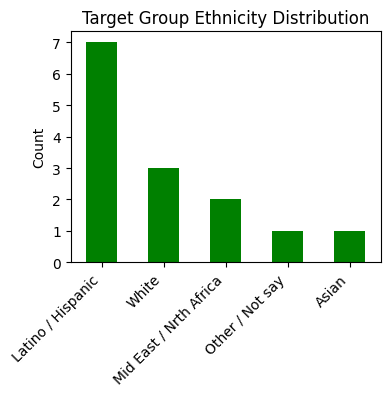

In [156]:
race_counts.plot(kind='bar', color='skyblue', figsize=(4, 3))
plt.ylabel("Count")
plt.title("All Participants Ethnicity Distribution")
short_labels = ["Latino / Hispanic", "White", "Other / Not say", "Mid East / Nrth Africa", "Asian"]
plt.xticks(rotation=45, ha="right", ticks= range(len(short_labels)), labels=short_labels)
plt.show()


race_counts_control.plot(kind='bar', color='coral', figsize=(4, 3))
plt.ylabel("Count")
plt.title("Control Group Ethnicity Distribution")
short_labels = ["Other / Not say", "White", "Asian", "Mid East / Nrth Africa", "Latino / Hispanic"]
plt.xticks(rotation=45, ha="right", ticks= range(len(short_labels)), labels=short_labels)
plt.show()


race_counts_target.plot(kind='bar', color='green', figsize=(4, 3))
plt.ylabel("Count")
plt.title("Target Group Ethnicity Distribution")
short_labels = ["Latino / Hispanic", "White", "Mid East / Nrth Africa", "Other / Not say", "Asian"]
plt.xticks(rotation=45, ha="right", ticks= range(len(short_labels)), labels=short_labels)
plt.show()


## Gender Analysis

In [133]:
genders = [user.get("gender") for user in user_data if user.get("gender") is not None]
genders_control = [user.get("gender") for user in user_data if user.get("group") == "control"]
genders_target = [user.get("gender") for user in user_data if user.get("group") != "control"]

print(genders)
print(genders_control)
print(genders_target)

['man', 'man', 'woman', 'man', 'woman', 'nonBinary', 'man', 'man', 'man', 'man', 'woman', 'man', 'man', 'man', 'man', 'woman', 'woman', 'man', 'woman', 'woman', 'man', 'woman']
['man', 'nonBinary', 'man', 'man', 'woman', 'man', 'woman', 'woman', 'woman', 'woman']
['man', 'man', 'woman', 'woman', 'man', 'man', 'man', 'man', 'man', 'man', 'man', 'woman']


In [134]:
gender_counts = pd.Series([gender for gender in genders]).value_counts()
gender_counts_control = pd.Series([gender for gender in genders_control]).value_counts()
gender_counts_target = pd.Series([gender for gender in genders_target]).value_counts()


print(gender_counts)
print(gender_counts_control)
print(gender_counts_target)

man          13
woman         8
nonBinary     1
Name: count, dtype: int64
woman        5
man          4
nonBinary    1
Name: count, dtype: int64
man      9
woman    3
Name: count, dtype: int64


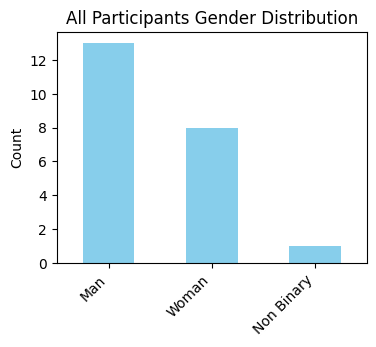

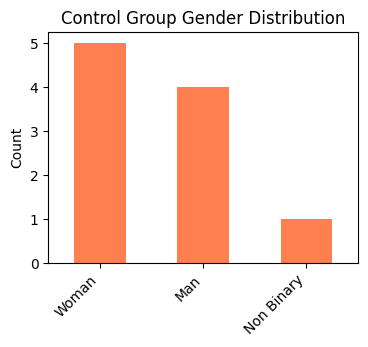

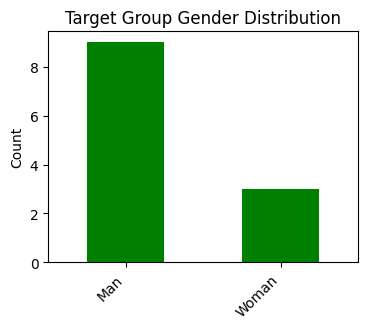

In [164]:
gender_counts.plot(kind='bar', color='skyblue', figsize=(4, 3))
plt.ylabel("Count")
plt.title("All Participants Gender Distribution")
plt.xticks(rotation=45, ha="right", ticks= range(3), labels=["Man", "Woman", "Non Binary"])
plt.show()

gender_counts_control.plot(kind='bar', color='coral', figsize=(4, 3))
plt.ylabel("Count")
plt.title("Control Group Gender Distribution")
plt.xticks(rotation=45, ha="right", ticks= range(3), labels=["Woman", "Man", "Non Binary"])
plt.show()

gender_counts_target.plot(kind='bar', color='green', figsize=(4, 3))
plt.ylabel("Count")
plt.title("Target Group Gender Distribution")
plt.xticks(rotation=45, ha="right", ticks= range(2), labels=["Man", "Woman"])
plt.show()

## Age Analysis

In [165]:
birthYears = [user.get("birthYear") for user in user_data if user.get("birthYear")]
print(birthYears)
birthYears_control = [user.get("birthYear") for user in user_data if user.get("group") == "control" if user.get("birthYear") != '']
birthYears_target = [user.get("birthYear") for user in user_data if user.get("group") != "control" if user.get("birthYear") != '']

birthYears = list(map(int, birthYears))
birthYears_control = list(map(int, birthYears_control))
birthYears_target = list(map(int, birthYears_target))

print(birthYears)
print(birthYears_control)
print(birthYears_target)

['1998', '2007', '1997', '2000', '1998', '2000', '1996', '1994', '2003', '2000', '1972', '1971', '1997', '1996', '1996', '1997', '2001', '1982', '1998', '1998', '2001', '1998']
[1998, 2007, 1997, 2000, 1998, 2000, 1996, 1994, 2003, 2000, 1972, 1971, 1997, 1996, 1996, 1997, 2001, 1982, 1998, 1998, 2001, 1998]
[2000, 2000, 1996, 2003, 1972, 1971, 1997, 2001, 1998, 1998]
[1998, 2007, 1997, 1998, 1994, 2000, 1997, 1996, 1996, 1982, 2001, 1998]


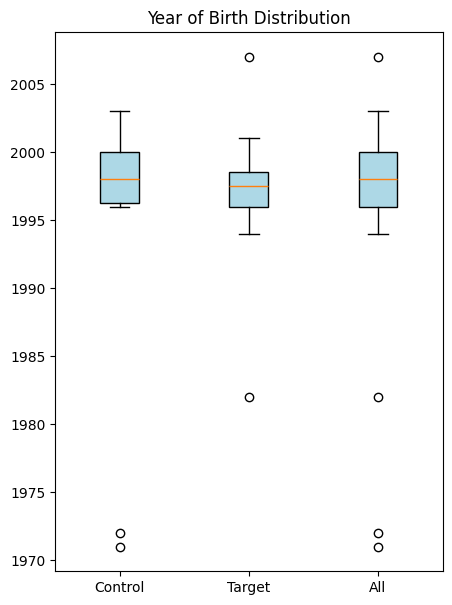

In [175]:
# Plot box plot for year of birth
plt.figure(figsize=(5, 7))
plt.boxplot([birthYears_control, birthYears_target, birthYears], vert=True, patch_artist=True, boxprops=dict(facecolor="lightblue"), tick_labels=['Control', 'Target', "All"])
plt.title("Year of Birth Distribution")
plt.show()


## Occupation

In [138]:
occupations = [user.get("professions") for user in user_data if user.get("professions")]
occupations_control = [user.get("professions") for user in user_data if user.get("group") == "control"]
occupations_target = [user.get("professions") for user in user_data if user.get("group") != "control"]

occupations_counts = pd.Series([occ for sublist in occupations for occ in sublist]).value_counts()
occupation_counts_control = pd.Series([occ for sublist in occupations_control for occ in sublist]).value_counts()
occupation_counts_target = pd.Series([occ for sublist in occupations_target for occ in sublist]).value_counts()

print(occupations_counts)
print(occupation_counts_control)
print(occupation_counts_target)

Informatics    13
Engineering     6
Business        4
Education       1
Science         1
Name: count, dtype: int64
Engineering    5
Informatics    3
Business       2
Science        1
Name: count, dtype: int64
Informatics    10
Business        2
Education       1
Engineering     1
Name: count, dtype: int64


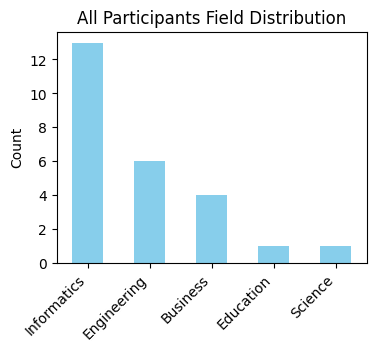

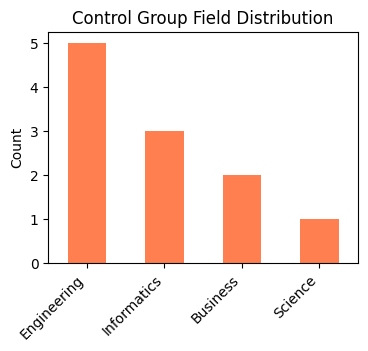

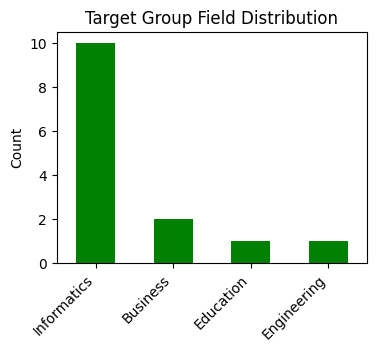

In [170]:
occupations_counts.plot(kind='bar', color='skyblue', figsize=(4, 3))
plt.ylabel("Count")
plt.title("All Participants Field Distribution")
plt.xticks(rotation=45, ha="right")
plt.show()


occupation_counts_control.plot(kind='bar', color='coral', figsize=(4, 3))
plt.ylabel("Count")
plt.title("Control Group Field Distribution")
plt.xticks(rotation=45, ha="right")
plt.show()

occupation_counts_target.plot(kind='bar', color='green', figsize=(4, 3))
plt.ylabel("Count")
plt.title("Target Group Field Distribution")
plt.xticks(rotation=45, ha="right")
plt.show()


## Education

In [140]:
education_options = [user.get("education") for user in user_data if user.get("education")]
education_options_control = [user.get("education") for user in user_data if user.get("group") == "control"]
education_options_target = [user.get("education") for user in user_data if user.get("group") != "control"]

education_counts = pd.Series([education_option for education_option in education_options]).value_counts()
education_counts_control = pd.Series([edu for edu in education_options_control]).value_counts()
education_counts_target = pd.Series([edu for edu in education_options_target]).value_counts()


print(education_counts)
print(education_counts_control)
print(education_counts_target)

bachelors         12
masters            6
high_school        3
apprenticeship     1
Name: count, dtype: int64
bachelors      7
masters        2
high_school    1
Name: count, dtype: int64
bachelors         5
masters           4
high_school       2
apprenticeship    1
Name: count, dtype: int64


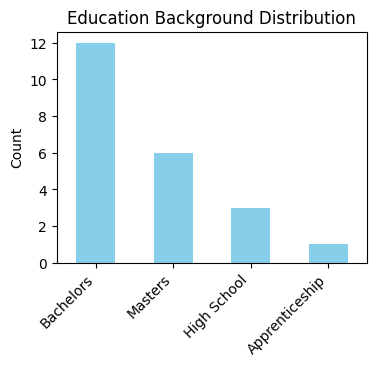

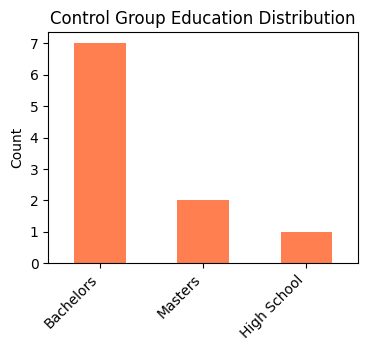

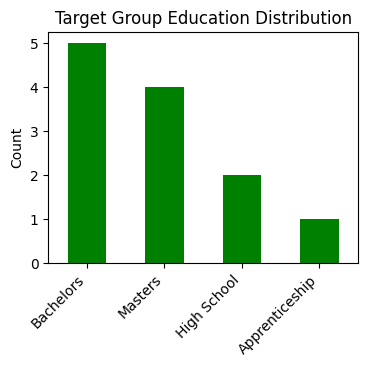

In [174]:
short_labels = ["Bachelors", "Masters", "High School", "Apprenticeship"]
education_counts.plot(kind='bar', color='skyblue', figsize=(4, 3))
plt.ylabel("Count")
plt.title("Education Background Distribution")
plt.xticks(rotation=45, ha="right", ticks=range(4), labels=short_labels)
plt.show()

short_labels = ["Bachelors", "Masters", "High School"]
education_counts_control.plot(kind='bar', color='coral', figsize=(4, 3))
plt.ylabel("Count")
plt.title("Control Group Education Distribution")
plt.xticks(rotation=45, ha="right", ticks=range(3), labels=short_labels)
plt.show()

short_labels = ["Bachelors", "Masters", "High School", "Apprenticeship"]
education_counts_target.plot(kind='bar', color='green', figsize=(4, 3))
plt.ylabel("Count")
plt.title("Target Group Education Distribution")
plt.xticks(rotation=45, ha="right",  ticks=range(4), labels=short_labels)
plt.show()
